In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from Bio import SeqIO
from glob import glob
import os

from genotyping import nucleotide_mutation_prob, mutation_prob, COUNTS_COLUMNS


# Plotting style
sns.set_style('white')
sns.set_context('notebook')
#pd.set_option('max_rows', 1000)
#pd.set_option('max_columns', 100)

def plot_style(figsize=(12, 6), labelsize=20, titlesize=24, ticklabelsize=14, **kwargs):
   basic_style = {
       'figure.figsize': figsize,
       'axes.labelsize': labelsize,
       'axes.titlesize': titlesize,
       'xtick.labelsize': ticklabelsize,
       'ytick.labelsize': ticklabelsize,
       'axes.spines.top': False,
       'axes.spines.right': False,
       'axes.spines.left': False,
       'axes.grid': False,
       'axes.grid.axis': 'y',
   }
   basic_style.update(kwargs)
   return plt.rc_context(rc=basic_style)

blue = sns.xkcd_rgb['ocean blue']


# Load matrices

In [12]:
INPUT_PATH = '/home/carler/lab/t_cell/phylogeny/data/ac_input/'
OUTPUT_PATH = '/home/carler/lab/t_cell/phylogeny/data/data_vizsualiation/'
RESULTS_PATH = f'{OUTPUT_PATH}/results'
e_rate = 0.0556
p_mutation = 1 / 500.0

In [13]:
datasets = ['A1_06', 'A1_30']


In [14]:
donor_dict = {'A1_06': [],
              'A1_30': []}

In [17]:
reads_matrix = donor_dict.copy()
for donor in datasets: 
    reads_matrix[donor] = pd.read_csv(f'{RESULTS_PATH}/{donor}_reads_{e_rate}.csv', index_col=0)

In [26]:
mutation_matrix = donor_dict.copy()

for donor in datasets: 
    mutation_matrix[donor] = pd.read_csv(f'{RESULTS_PATH}/{donor}_pmat_{e_rate}.csv', sep=',')

In [46]:
clones_metadata = pd.read_csv('/home/carler/lab/t_cell/meta_data/2023_04_06_A1_06_A1_30_YFV2003_JH_meta_data_invivo_t_cell_mito_project.csv')
clones_map = clones_metadata[['Sample_id', 'clone_id']].set_index('Sample_id')

# Filter pmat

In [27]:
mutation_matrix_no_clone_0 = mutation_matrix.copy()

In [28]:
mutation_matrix_no_clone_0[donor]

POS  A1_30_D14_p1_A10  A1_30_D14_p1_A11  A1_30_D14_p1_A21  \
0          1               NaN               NaN               NaN   
1          2               NaN               NaN               NaN   
2          3               NaN               NaN               NaN   
3          4               NaN               NaN               NaN   
4          5               NaN               NaN               NaN   
...      ...               ...               ...               ...   
16564  16565               NaN               NaN          0.000083   
16565  16566               NaN               NaN          0.000087   
16566  16567               NaN               NaN          0.000091   
16567  16568               NaN               NaN          0.000083   
16568  16569               NaN               NaN          0.000087   

       A1_30_D14_p1_A5  A1_30_D14_p1_B1  A1_30_D14_p1_B11  A1_30_D14_p1_C10  \
0                  NaN              NaN          0.000143             0.002   
1                  NaN              NaN          0.000134             0.002   
2                  NaN              NaN          0.000134             0.002   
3                  NaN              NaN          0.000134             0.002   
4                  NaN              NaN          0.000134             0.002   
...                ...              ...               ...               ...   
16564              NaN              NaN          0.000200               NaN   
16565              NaN              NaN          0.000200               NaN   
16566              NaN              NaN          0.000200               NaN   
16567              NaN              NaN          0.000200               NaN   
16568              NaN              NaN          0.000250               NaN   

       A1_30_D14_p1_C11  A1_30_D14_p1_C15  ...  A1_30_D180_p5_P16  \
0              0.000125               NaN  ...                NaN   
1              0.000118               NaN  ...                NaN   
2              0.000118               NaN  ...                NaN   
3              0.000118               NaN  ...                NaN   
4              0.000125               NaN  ...                NaN   
...                 ...               ...  ...                ...   
16564               NaN               NaN  ...                NaN   
16565               NaN               NaN  ...                NaN   
16566               NaN               NaN  ...                NaN   
16567               NaN               NaN  ...                NaN   
16568               NaN               NaN  ...                NaN   

       A1_30_D180_p5_P17  A1_30_D180_p5_P18  A1_30_D180_p5_P20  \
0               0.000401           0.000182                NaN   
1               0.000401           0.000182                NaN   
2               0.000401           0.000182                NaN   
3               0.000401           0.000182                NaN   
4               0.000401           0.000182                NaN   
...                  ...                ...                ...   
16564           0.000501           0.000501                NaN   
16565           0.000501           0.000501                NaN   
16566           0.000501           0.000501                NaN   
16567           0.000501           0.000501                NaN   
16568           0.000501           0.000501                NaN   

       A1_30_D180_p5_P21  A1_30_D180_p5_P22  A1_30_D180_p5_P23  \
0                    NaN                NaN           0.000250   
1                    NaN                NaN           0.000250   
2                    NaN                NaN           0.000286   
3                    NaN                NaN           0.000250   
4                    NaN                NaN           0.000250   
...                  ...                ...                ...   
16564                NaN                NaN           0.000087   
16565                NaN                NaN           0.000091   
165

In [29]:
mutation_matrix_no_clone_0[donor].fillna(0) > 0.01

POS  A1_30_D14_p1_A10  A1_30_D14_p1_A11  A1_30_D14_p1_A21  \
0      True             False             False             False   
1      True             False             False             False   
2      True             False             False             False   
3      True             False             False             False   
4      True             False             False             False   
...     ...               ...               ...               ...   
16564  True             False             False             False   
16565  True             False             False             False   
16566  True             False             False             False   
16567  True             False             False             False   
16568  True             False             False             False   

       A1_30_D14_p1_A5  A1_30_D14_p1_B1  A1_30_D14_p1_B11  A1_30_D14_p1_C10  \
0                False            False             False             False   
1                False            False             False             False   
2                False            False             False             False   
3                False            False             False             False   
4                False            False             False             False   
...                ...              ...               ...               ...   
16564            False            False             False             False   
16565            False            False             False             False   
16566            False            False             False             False   
16567            False            False             False             False   
16568            False            False             False             False   

       A1_30_D14_p1_C11  A1_30_D14_p1_C15  ...  A1_30_D180_p5_P16  \
0                 False             False  ...              False   
1                 False             False  ...              False   
2                 False             False  ...              False   
3                 False             False  ...              False   
4                 False             False  ...              False   
...                 ...               ...  ...                ...   
16564             False             False  ...              False   
16565             False             False  ...              False   
16566             False             False  ...              False   
16567             False             False  ...              False   
16568             False             False  ...              False   

       A1_30_D180_p5_P17  A1_30_D180_p5_P18  A1_30_D180_p5_P20  \
0                  False              False              False   
1                  False              False              False   
2                  False              False              False   
3                  False              False              False   
4                  False              False              False   
...                  ...                ...                ...   
16564              False              False              False   
16565              False              False              False   
16566              False              False              False   
16567              False              False              False   
16568              False              False              False   

       A1_30_D180_p5_P21  A1_30_D180_p5_P22  A1_30_D180_p5_P23  \
0                  False              False              False   
1                  False              False              False   
2                  False              False              False   
3                  False              False              False   
4                  False              False              False   
...                  ...                ...                ...   
16564              False              False              False   
16565              False              False              False   
16566         

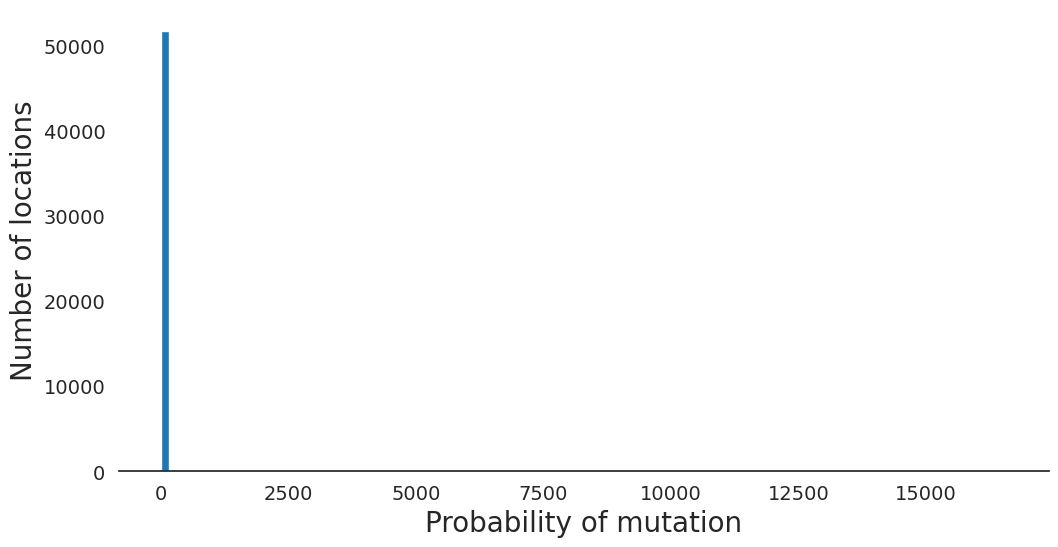

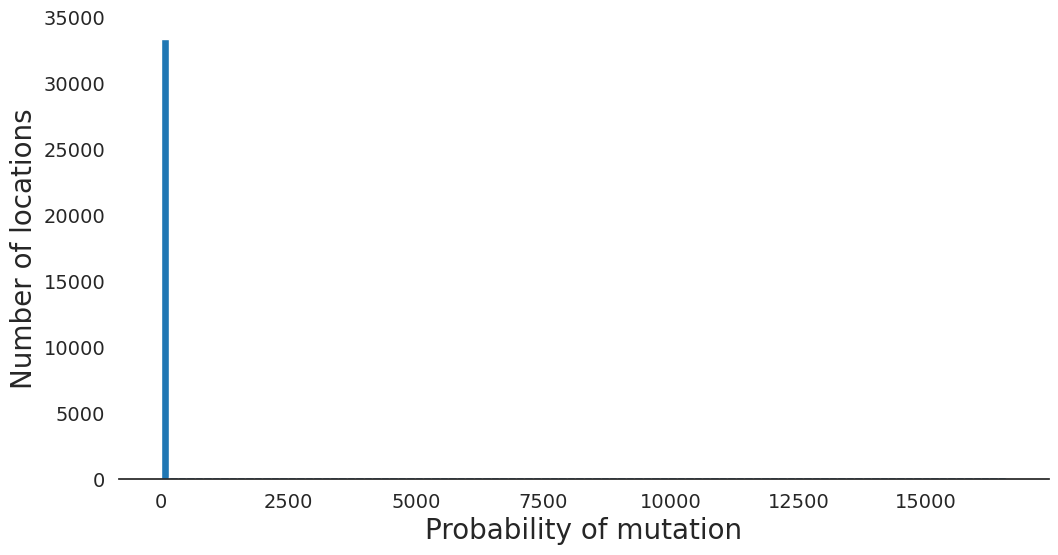

In [30]:
for donor in datasets: 
    with plot_style():
        plt.figure()
        plt.hist(mutation_matrix_no_clone_0[donor].values.ravel()[(mutation_matrix_no_clone_0[donor].fillna(0) > 0.01).values.ravel()], bins=100);
        plt.xlabel('Probability of mutation')
        plt.ylabel('Number of locations')

In [32]:
# Only keep locations where at least one cell has high probability of mutation
mutation_threshold = 0.2
data = mutation_matrix_no_clone_0.copy()
mutation_any_cell = donor_dict.copy()
for donor in datasets:
    mutation_any_cell[donor] = data[donor][(data[donor] > mutation_threshold).any(axis=1)]
    mutation_any_cell[donor].shape

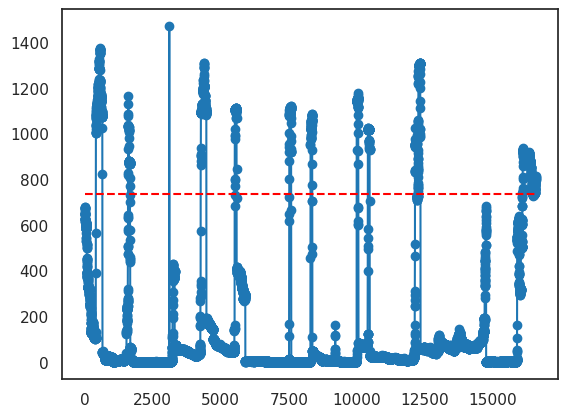

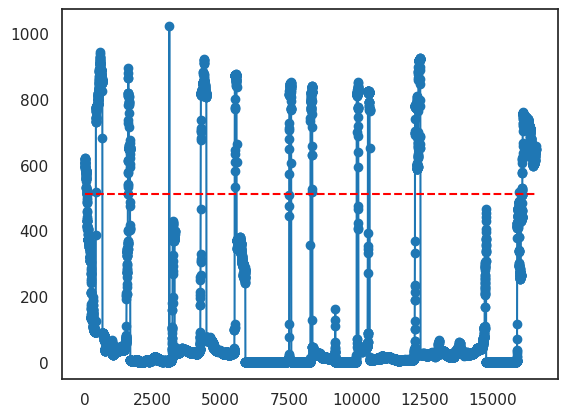

In [34]:
for donor in datasets: 
    # Remove locations if more than 50% have missing data
    plt.figure()
    n_nans_per_location = mutation_any_cell[donor].isna().sum(axis=1)
    n_nans_per_location.plot(marker='o')
    halva = mutation_any_cell[donor].shape[1] / 2
    plt.plot([0, mutation_matrix[donor].shape[0]], [halva, halva], 'r--')

In [35]:
mutations_with_enough_data = donor_dict.copy()
for donor in datasets: 
    mutations_with_enough_data[donor] = mutation_any_cell[donor][n_nans_per_location <= halva]
    print(mutations_with_enough_data[donor].shape)

(14926, 1472)
(14926, 1024)


In [36]:
# do not remove clusters of mutations
clust = mutations_with_enough_data.copy()
print(clust['A1_06'].shape)

(14926, 1472)


In [38]:
high_coverage_pmat = donor_dict.copy()
for donor in datasets:
    # Remove locations with low mean coverage
    mean_coverage = reads_matrix[donor].mean(axis=1)
    threshold = 100
    high_coverage_pmat[donor] = clust[donor].loc[mean_coverage > threshold]
    print(high_coverage_pmat[donor].shape)

(10691, 1472)
(10722, 1024)


In [39]:
# Remove mutations that are shared by a certain number of cells in the population
#n_cells_with_mutation_at_loc = (high_coverage_pmat > 0.2).sum(axis=1)

In [40]:
# Make sure that the limit is larger than the largest clone!
#limit = 45
#with plot_style(figsize=(20, 4)):
#    n_cells_with_mutation_at_loc.plot()
#    plt.plot([0, mutation_matrix.shape[0]], [limit, limit], 'r--')
#    plt.ylim(0, 200)

In [41]:
#final_pmat = high_coverage_pmat[n_cells_with_mutation_at_loc < limit]
#final_pmat.shape

In [42]:
# Remove mutations that have more than x% outside main clone

In [43]:
cells_with_mutations_at_pos = donor_dict.copy()
for donor in datasets:
    cells_with_mutations_at_pos[donor] = (high_coverage_pmat[donor] > 0.2)

In [47]:
clones_map

clone_id
Sample_id                 
A1_06_D180_p3_G10       A0
A1_06_D180_p1_C17       A1
A1_06_D14_p3_H9        A-2
A1_06_D180_p1_I19      A-2
A1_06_D180_p1_N6        A2
...                    ...
JHDex_23              D546
JH_D15_p1_K24         D156
JH_D15_p3_O23          D-2
JH_D15_p3_M11          D75
JH_D15_p1_I16         D143

[14943 rows x 1 columns]

In [48]:
clones_with_mutation_at_pos = donor_dict.copy()
for donor in datasets: 
    cols_to_clones = high_coverage_pmat[donor].columns.map(clones_map['clone_id'])
    clones_with_mutation_at_pos[donor] = cells_with_mutations_at_pos[donor].groupby(cols_to_clones, axis=1).sum()

In [49]:
main_clone = donor_dict.copy()
for donor in datasets: 
    main_clone[donor] = clones_with_mutation_at_pos[donor].idxmax(axis=1).to_frame()
    main_clone[donor].columns = ['main_clone']
    main_clone[donor].head()

In [50]:
for donor in datasets: 
    main_clone[donor]['n_cells_with_mutation'] = clones_with_mutation_at_pos[donor].sum(axis=1)
    main_clone[donor]['in_main_clone'] = clones_with_mutation_at_pos[donor].lookup(main_clone[donor].index, main_clone[donor]['main_clone'])
    main_clone[donor]['out_main_clone'] = main_clone[donor]['n_cells_with_mutation'] - main_clone[donor]['in_main_clone']
    main_clone[donor]['ratio_out_of_clone'] = main_clone[donor]['out_main_clone'] / main_clone[donor]['in_main_clone']

/tmp/ipykernel_2387769/3634068338.py:3: FutureWarning: The 'lookup' method is deprecated and will be removed in a future version. You can use DataFrame.melt and DataFrame.loc as a substitute.
  main_clone[donor]['in_main_clone'] = clones_with_mutation_at_pos[donor].lookup(main_clone[donor].index, main_clone[donor]['main_clone'])
/tmp/ipykernel_2387769/3634068338.py:3: FutureWarning: The 'lookup' method is deprecated and will be removed in a future version. You can use DataFrame.melt and DataFrame.loc as a substitute.
  main_clone[donor]['in_main_clone'] = clones_with_mutation_at_pos[donor].lookup(main_clone[donor].index, main_clone[donor]['main_clone'])


In [52]:
too_many_out_of_clone = 0.8

pmat_with_main_clone = donor_dict.copy()
for donor in datasets:
    pmat_with_main_clone[donor] = high_coverage_pmat[donor][main_clone[donor]['ratio_out_of_clone'] <= too_many_out_of_clone]
    print(pmat_with_main_clone[donor].shape)

(2180, 1472)
(2024, 1024)


# Plot pmat

In [53]:
pmat = pmat_with_main_clone.copy()

In [27]:
version = 1
fname = f'{RESULTS_PATH}/{DATA_NAME}_pmat_filtered_no_bulk_{e_rate}_v{version}.csv'
fname


'../../../data/20210712_A1_06/results/A1_06_pmat_filtered_no_bulk_0.0778_v1.csv'

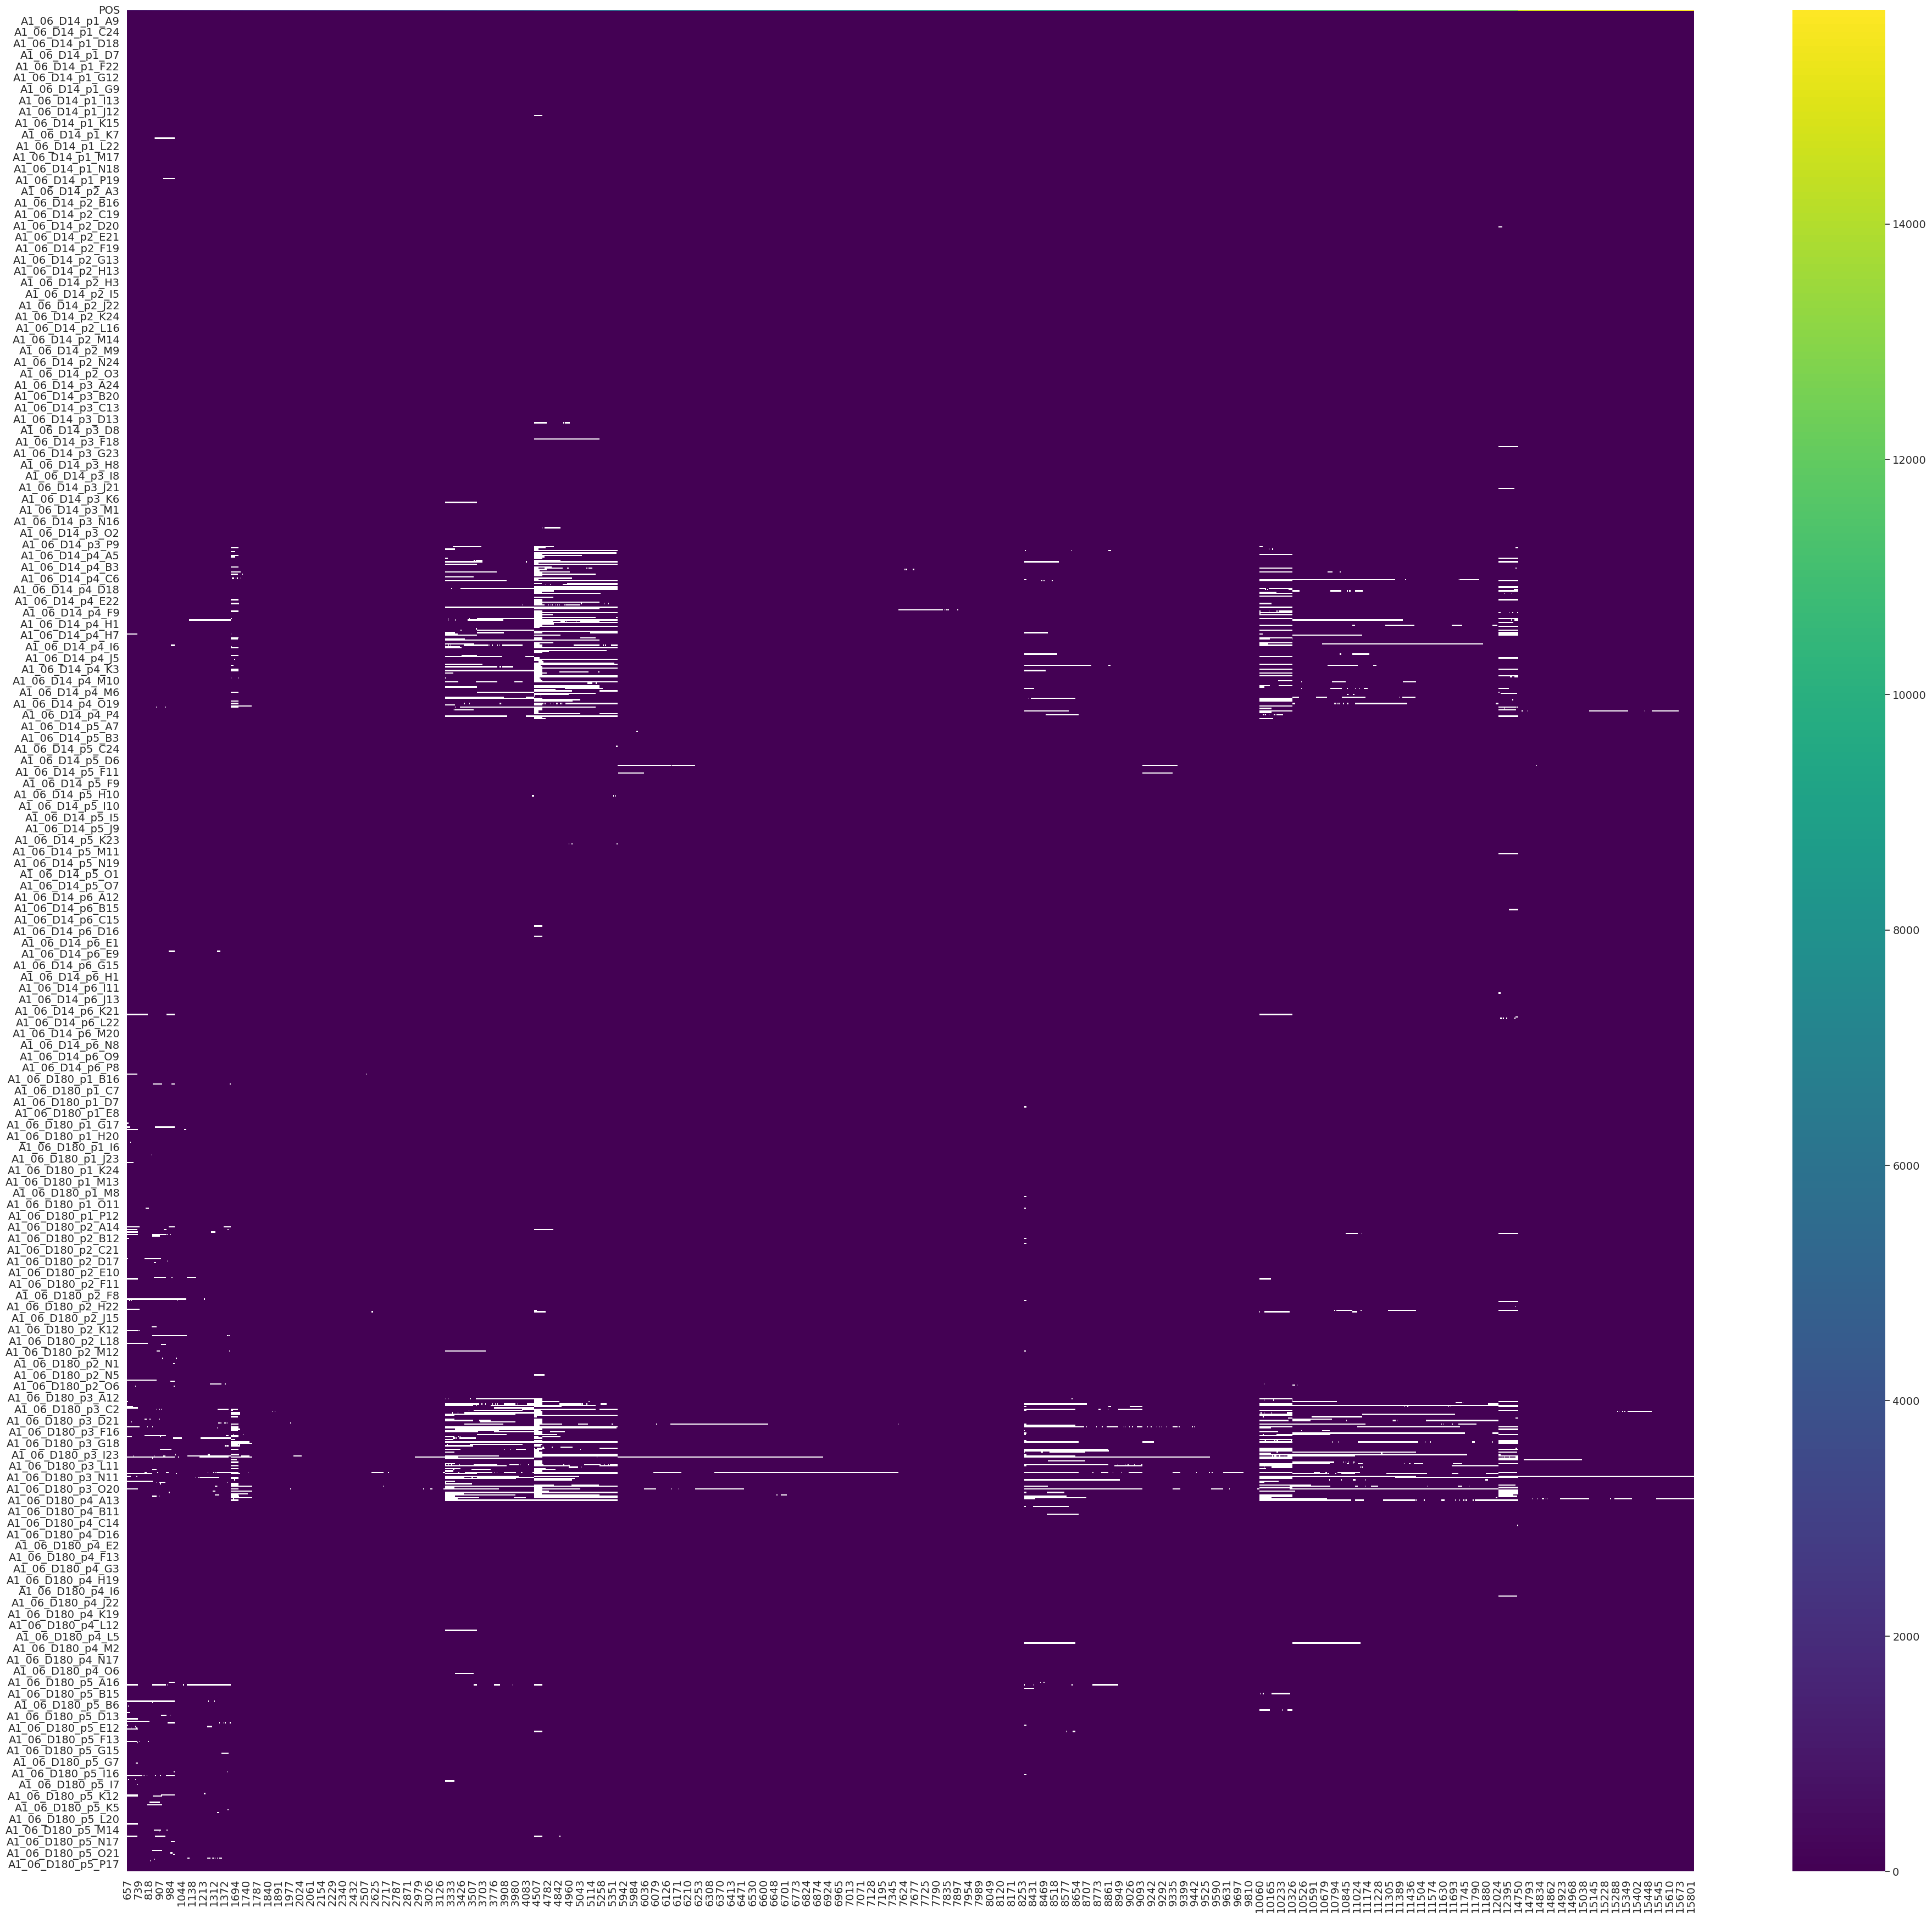

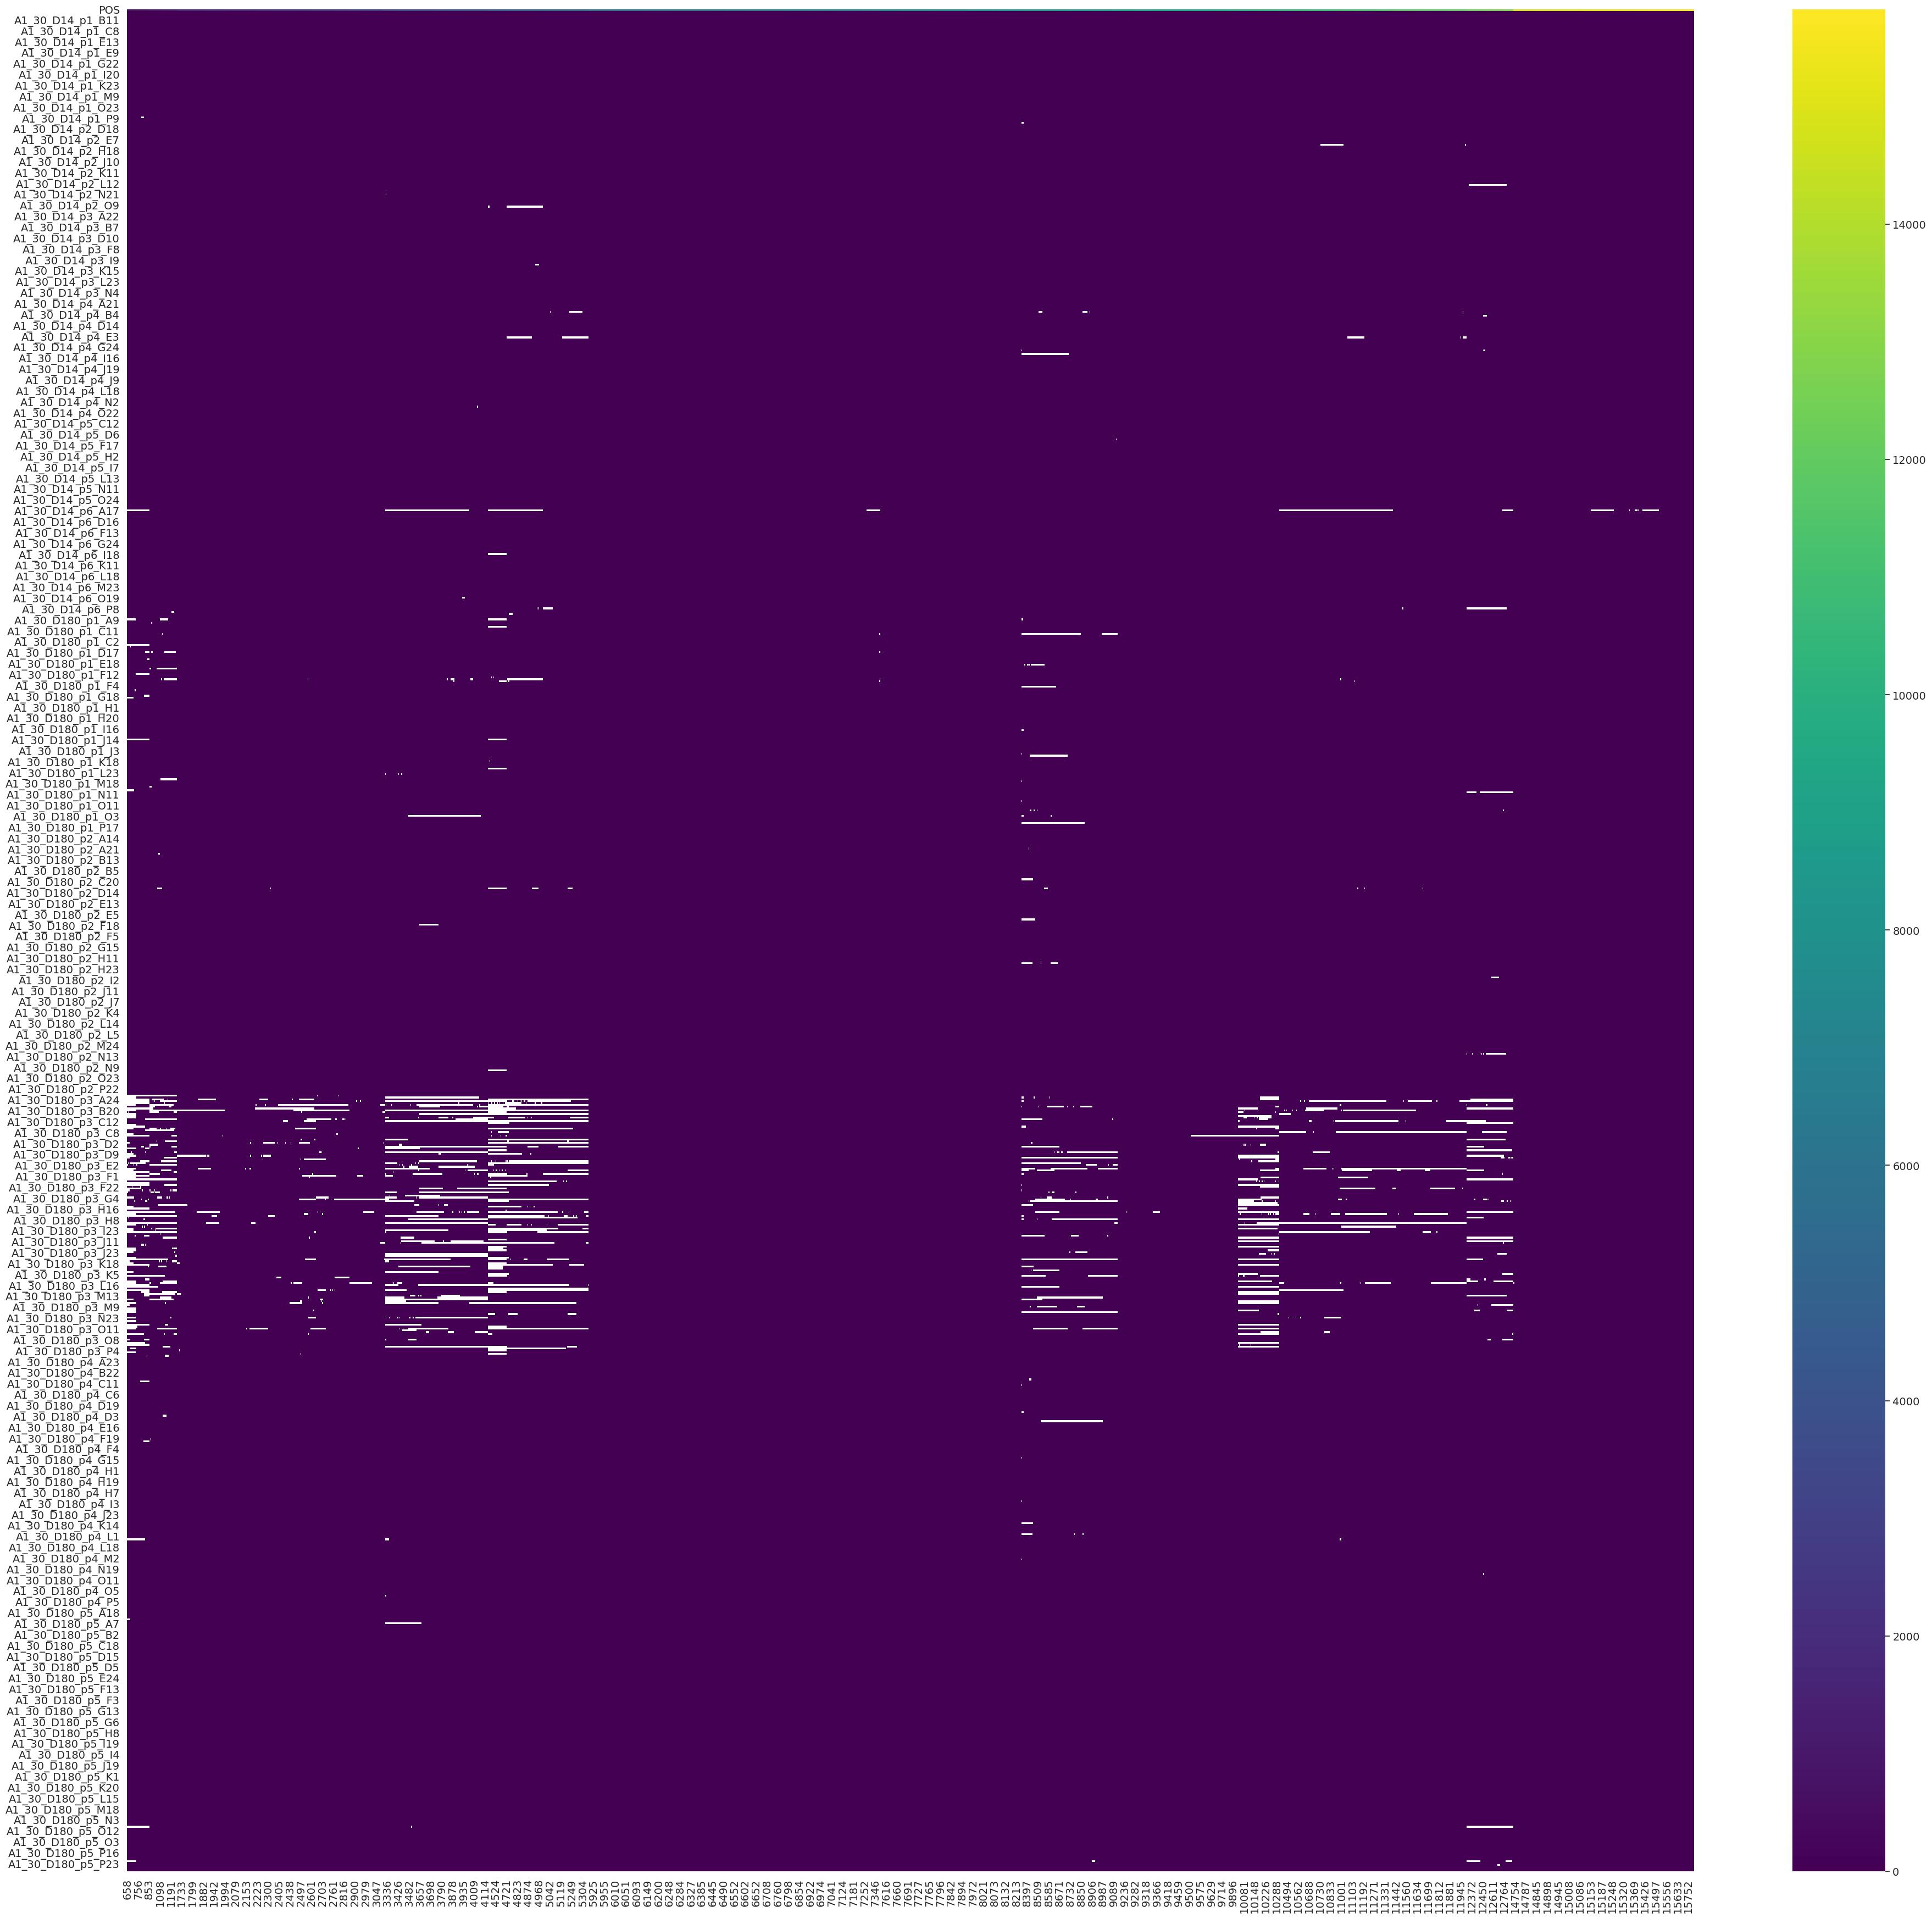

In [56]:
for donor in datasets:
    with plot_style(figsize=(46, 44)):
        plt.figure()
        sns.heatmap(pmat[donor].T, cmap='viridis', linewidths=0.0)
        plt.xlabel('')


# Version with TCR

In [64]:
clones_map_in_pmat = donor_dict.copy()
for donor in datasets: 
    clones_map_in_pmat[donor] = clones_map.reindex(pmat[donor].columns)
    clones_map_in_pmat[donor] = clones_map_in_pmat[donor].drop('POS', axis=0)
    clones_map_in_pmat[donor].shape

In [66]:
all_clones = donor_dict.copy()
for donor in datasets:     
    all_clones[donor] = list(clones_map_in_pmat[donor].clone_id.unique())
    len(all_clones)

In [67]:
tcr = donor_dict.copy()
for donor in datasets: 
    tcr[donor] = pd.DataFrame(index=[f'tcr_{c}' for c in all_clones[donor]], columns=pmat[donor].columns, data=0)
    tcr[donor].index.name = 'POS'
    print(tcr[donor].shape)

(66, 1472)
(50, 1024)


In [68]:
clone_groups = donor_dict.copy()
for donor in datasets: 
    clone_groups[donor] = clones_map_in_pmat[donor].groupby('clone_id')
    for clone_name, df in clone_groups[donor]:
        clone_ids = df.index
        tcr[donor].loc[f'tcr_{clone_name}', clone_ids] = 1.0

In [69]:
for donor in datasets: 
    pmat[donor] = pd.concat((pmat[donor], tcr[donor]), axis=0)
pmat['A1_06'].head()

POS  A1_06_D14_p1_A14  A1_06_D14_p1_A15  A1_06_D14_p1_A16  \
657  658          0.000016          0.000032          0.000006   
667  668          0.000016          0.000031          0.000006   
678  679          0.000015          0.000029          0.000006   
682  683          0.000015          0.000036          0.000006   
691  692          0.000015          0.000036          0.000007   

     A1_06_D14_p1_A21  A1_06_D14_p1_A22  A1_06_D14_p1_A23  A1_06_D14_p1_A4  \
657          0.000013          0.000010          0.000008         0.000074   
667          0.000014          0.000010          0.000008         0.000072   
678          0.000021          0.000008          0.000008         0.000074   
682          0.000013          0.000008          0.000008         0.000074   
691          0.000013          0.000008          0.000008         0.000069   

     A1_06_D14_p1_A5  A1_06_D14_p1_A9  ...  A1_06_D180_p5_O4  \
657         0.000010         0.000007  ...          0.000668   
667         0.000011         0.000007  ...          0.000668   
678         0.000010         0.000007  ...          0.000668   
682         0.000010         0.000007  ...          0.000668   
691         0.000009         0.000007  ...          0.000668   

     A1_06_D180_p5_O5  A1_06_D180_p5_O6  A1_06_D180_p5_P15  A1_06_D180_p5_P16  \
657             0.002          0.000033              0.002           0.000083   
667             0.002          0.000033              0.002           0.000083   
678             0.002          0.000032              0.002           0.000074   
682             0.002          0.000032              0.002           0.000074   
691             0.002          0.000030              0.002           0.000077   

     A1_06_D180_p5_P17  A1_06_D180_p5_P18  A1_06_D180_p5_P21  \
657           0.000035           0.000024           0.000029   
667           0.000036           0.000024           0.000029   
678           0.000036           0.000023           0.000029   
682           0.000035           0.000023           0.000029   
691           0.000034           0.000023           0.000028   

     A1_06_D180_p5_P3  A1_06_D180_p5_P6  
657          0.000401          0.000167  
667          0.000401          0.000167  
678          0.000334          0.000367  
682          0.000334          0.000143  
691          0.000334          0.000134  

[5 rows x 1472 columns]

In [36]:
fname = f'{RESULTS_PATH}/{DATA_NAME}_pmat_filtered_with_tcr_{e_rate}_v{version}.csv'
pmat.to_csv(fname)
fname

'../../../data/20210712_A1_06/results/A1_06_pmat_filtered_with_tcr_0.0778_v1.csv'

In [71]:
mutated = donor_dict.copy()
for donor in datasets: 
    mutated[donor] = pmat[donor] > 0.2

In [72]:
mutated['A1_06'].sum().value_counts().sort_index()

1       368
2       396
3       289
4       171
5       110
6        66
7        38
8        14
9        12
10        2
11        2
12        2
13        1
2180      1
dtype: int64

# Version with TCR and each mutation in at least 2 cells

In [73]:
pmat_at_least_2_cells = donor_dict.copy()
for donor in datasets:
    pmat_at_least_2_cells[donor] = pmat[donor].loc[pmat[donor].sum(axis=1) >= 1.2, :]
pmat[donor].shape, pmat_at_least_2_cells[donor].shape

((2074, 1024), (2074, 1024))

In [40]:
fname = f'{RESULTS_PATH}/{DATA_NAME}_pmat_filtered_with_tcr_2_cells_{e_rate}_v{version}.csv'
pmat_at_least_2_cells.to_csv(fname)
fname

'../../../data/20210712_A1_06/results/A1_06_pmat_filtered_with_tcr_2_cells_0.0778_v1.csv'

# Order cells by clone

In [74]:
clones_map_sorted = donor_dict.copy()
for donor in datasets: 
    clones_map_sorted[donor] = clones_map_in_pmat[donor].sort_values('clone_id')

In [75]:
for donor in datasets: 
    pmat[donor] = pmat[donor].loc[:, clones_map_sorted[donor].index]

In [76]:
clone_groups = donor_dict.copy()
for donor in datasets: 
    clone_groups[donor] = clones_map_sorted[donor].groupby('clone_id')

In [78]:
indices = donor_dict.copy()


for donor in datasets:
    sorting_pmat = pmat.copy()
    for clone_name, df in clone_groups[donor]:
        print(clone_name)
        clone_ids = df.index
        clone_pmat = sorting_pmat[donor].loc[:, clone_ids]
        mutation_tot_per_loc = clone_pmat.sum(axis=1)

        order = mutation_tot_per_loc.argsort().values[::-1]
        keep = mutation_tot_per_loc.iloc[order] > 0.1
        indices[donor].extend(order[keep])

        sorting_pmat[donor].loc[keep, :] = 0


A0
A1
A100
A106
A107
A113
A122
A13
A130
A137
A142
A151
A154
A155
A159
A16
A161
A171
A177
A181
A187
A19
A192
A199
A204
A212
A22
A247
A255
A28
A3
A30
A31
A327
A330
A345
A36
A360
A362
A39
A397
A40
A41
A47
A48
A480
A5
A50
A53
A55
A555
A57
A584
A60
A61
A64
A65
A68
A69
A7
A70
A74
A80
A85
A9
A94
B0
B100
B101
B102
B117
B12
B121
B122
B14
B165
B18
B185
B191
B205
B211
B212
B214
B225
B24
B243
B257
B293
B304
B305
B324
B325
B33
B39
B44
B488
B51
B531
B57
B60
B63
B66
B664
B67
B69
B7
B71
B72
B73
B744
B8
B81
B83
B85
B858
B94


In [79]:
for donor in datasets: 
    pmat[donor] = pmat[donor].iloc[indices[donor], :]

In [80]:
column_labels = donor_dict.copy()

plot_pmat = donor_dict.copy()
for donor in datasets:
    column_labels[donor] = [c + ' ' + str(clones_map_in_pmat[donor].loc[c, 'clone_id'])  for c in pmat[donor].columns]
    plot_pmat[donor] = pmat[donor].copy().fillna(0)
    plot_pmat[donor].columns = column_labels[donor]


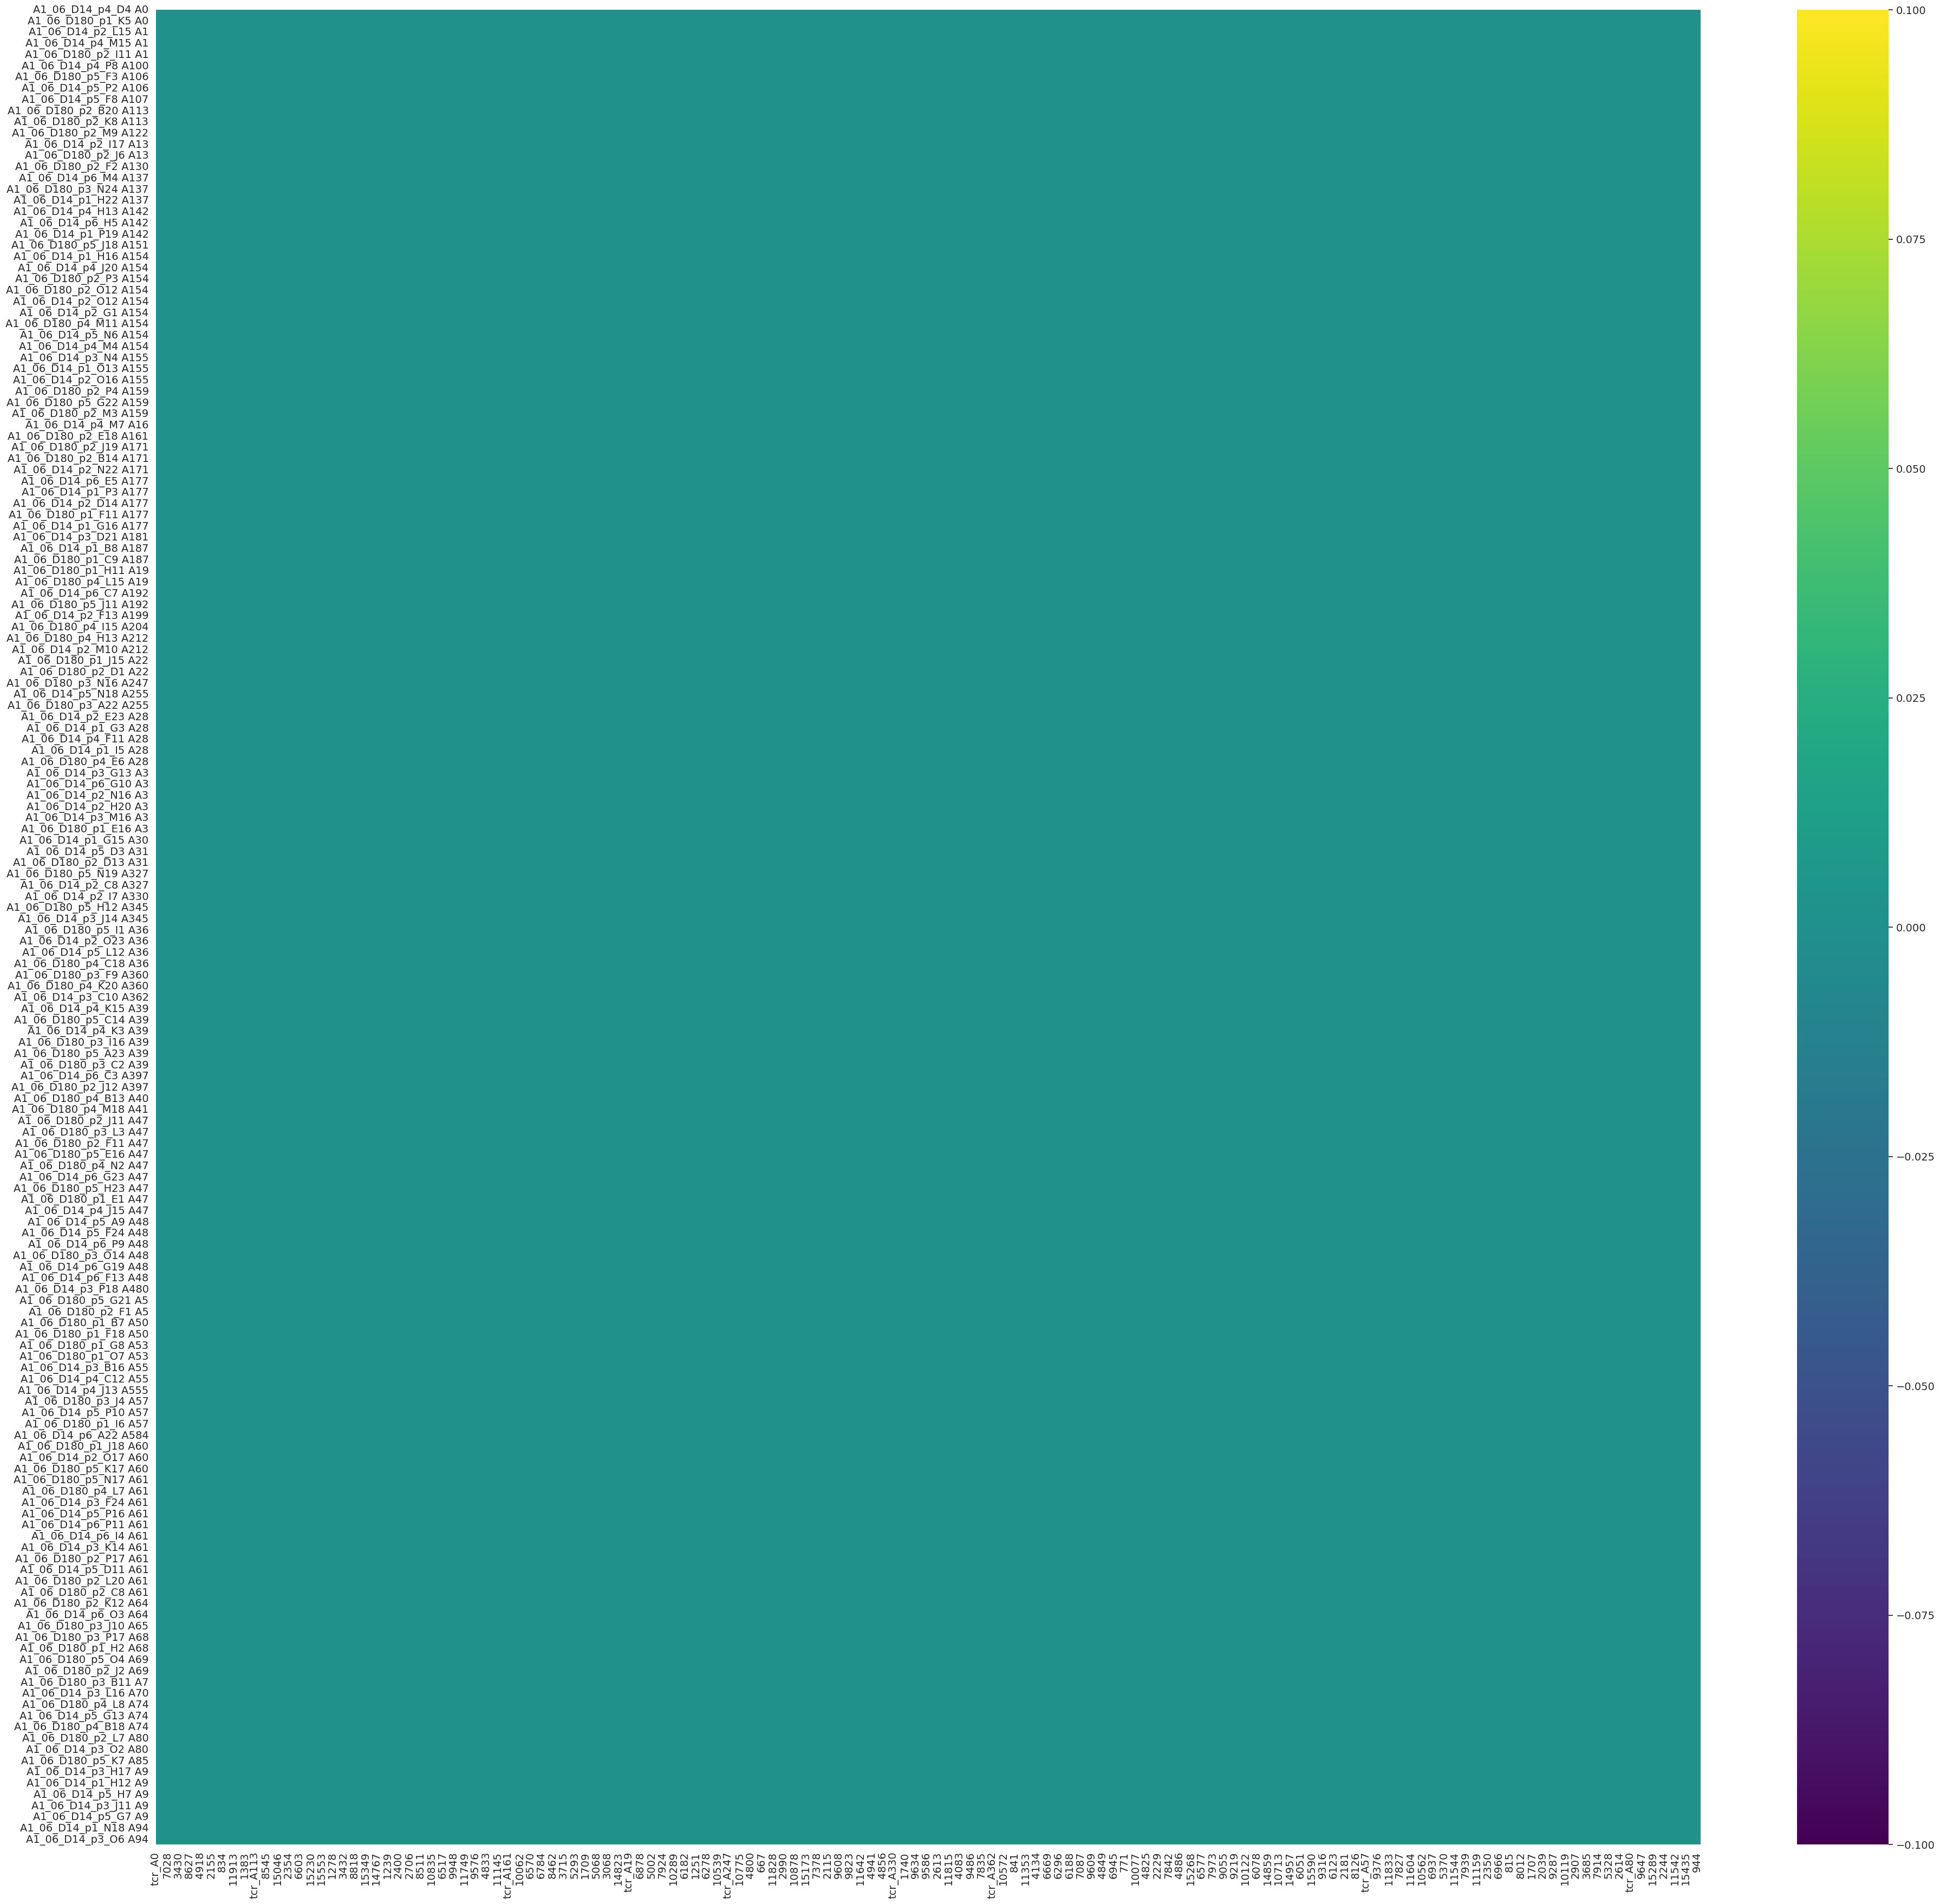

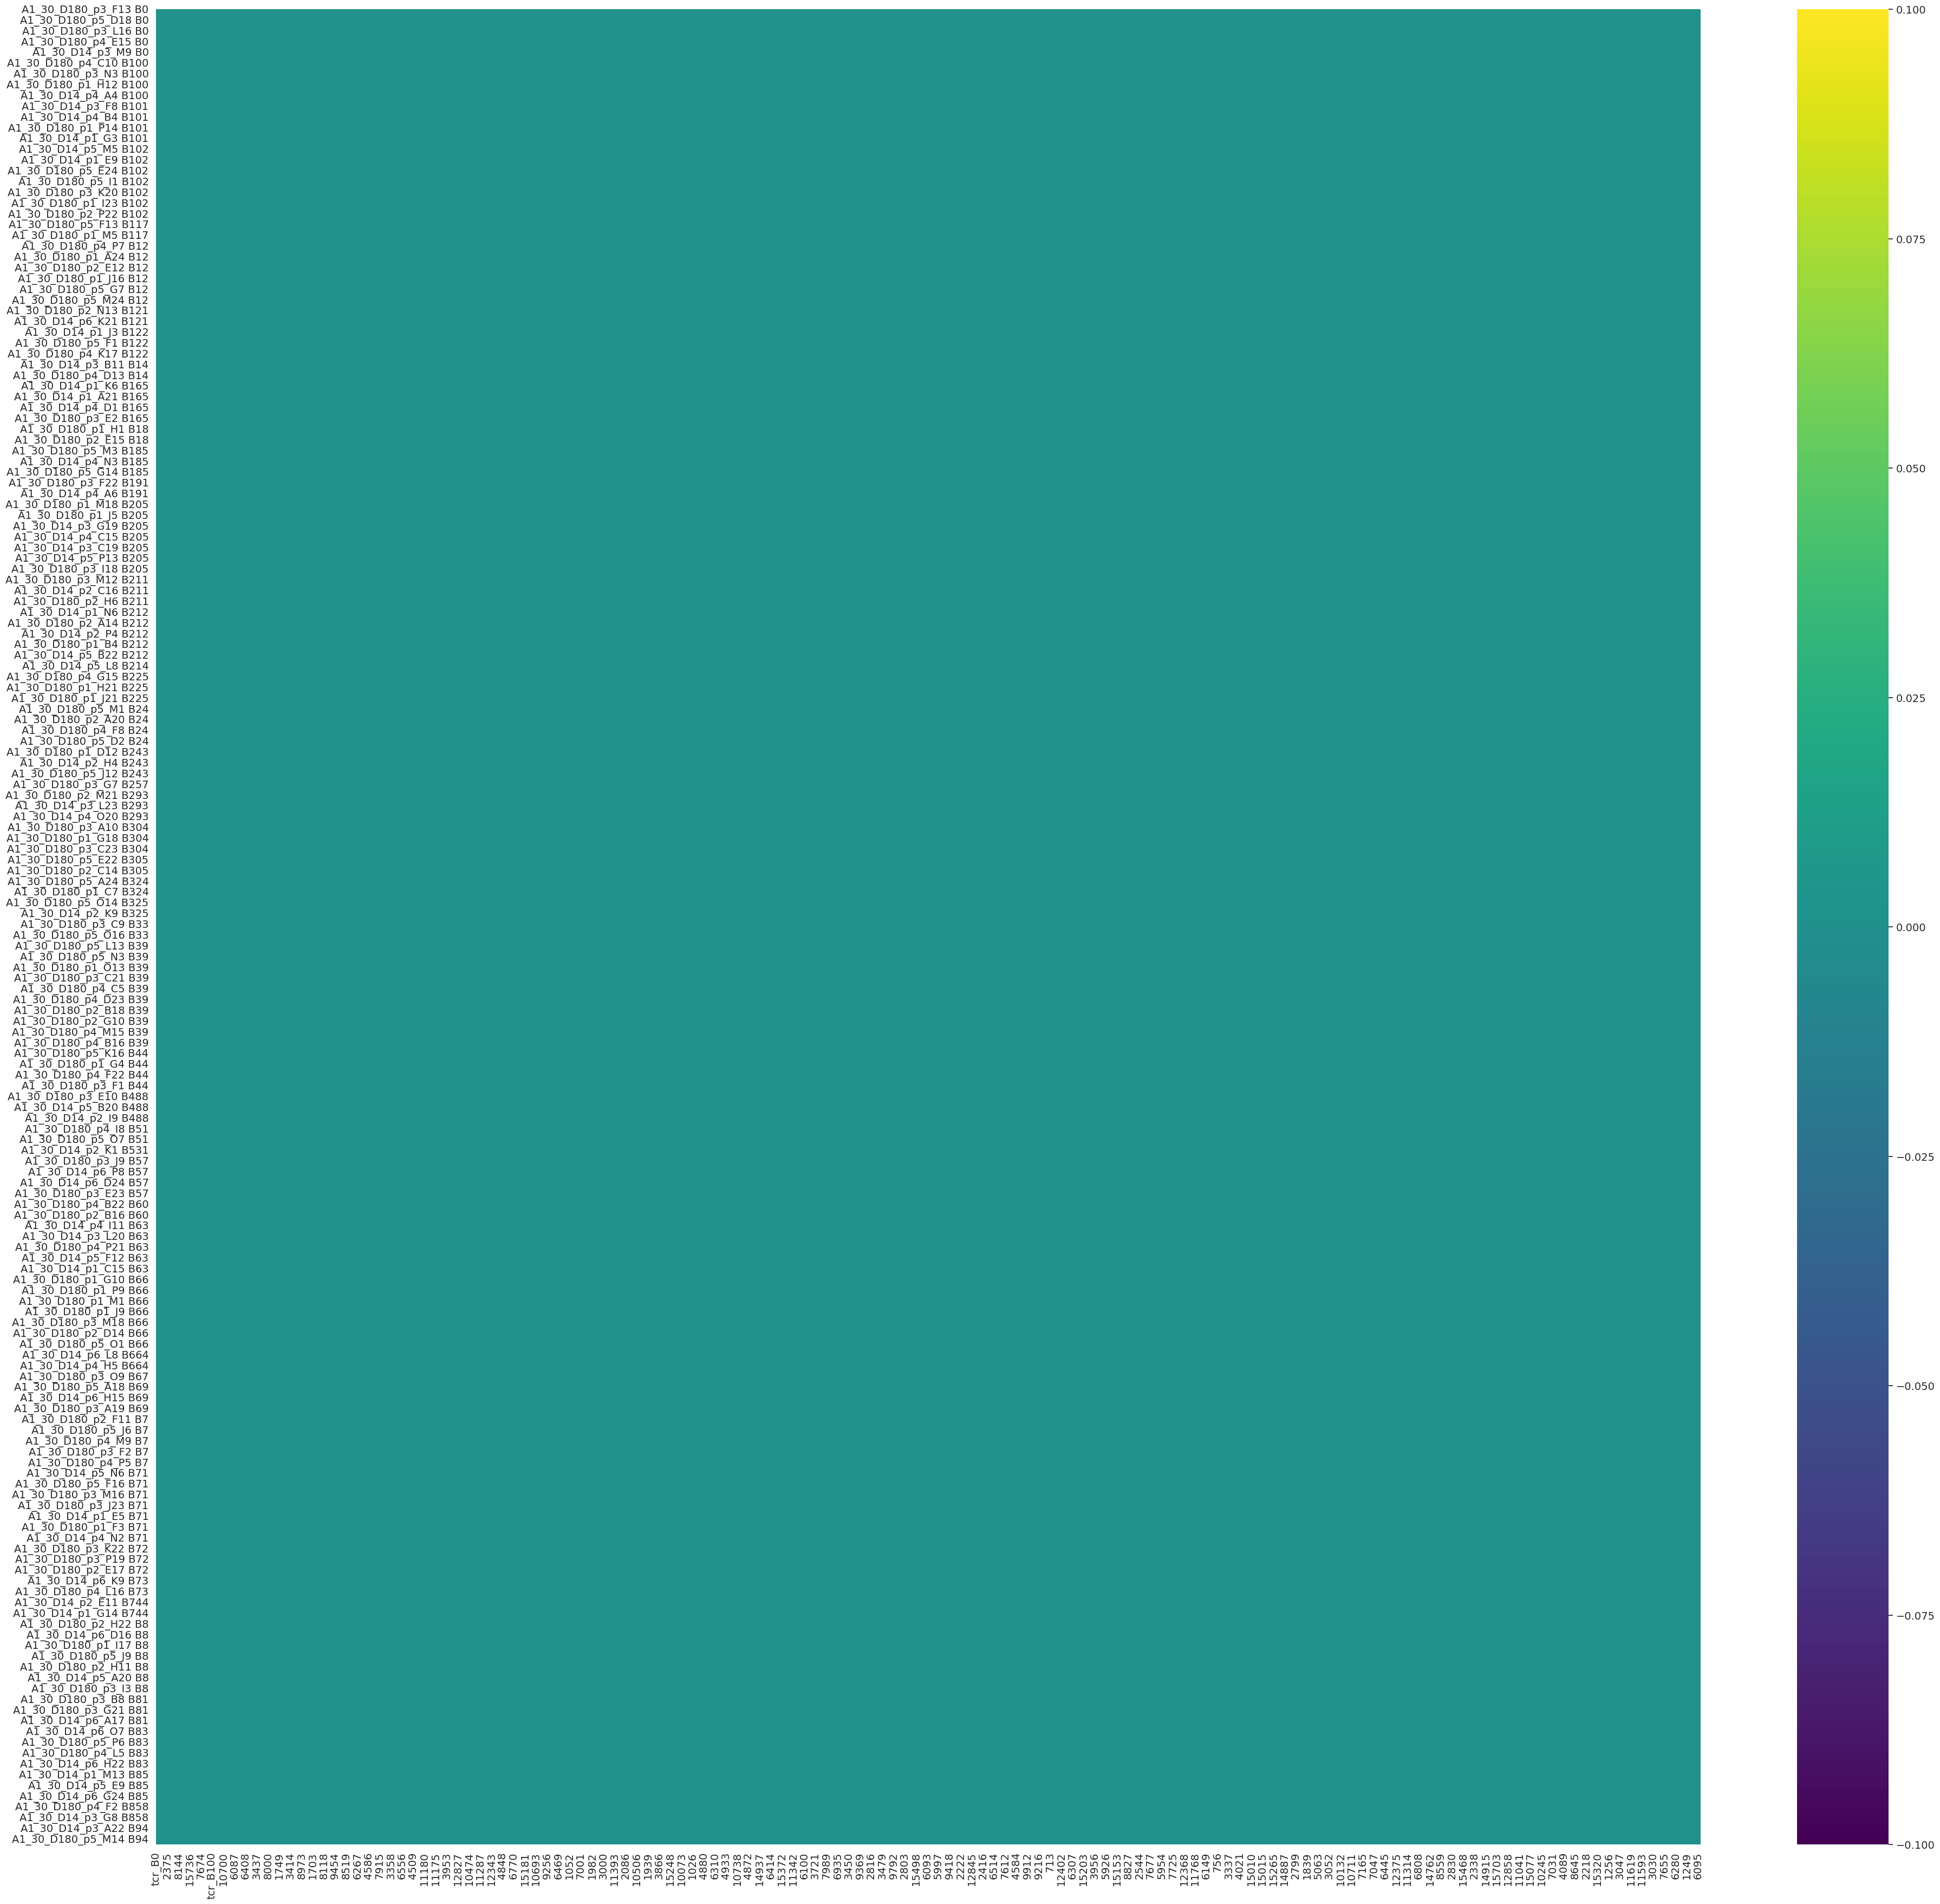

In [81]:


for donor in datasets: 
    with plot_style(figsize=(46, 44)):
        plt.figure()
        sns.heatmap(plot_pmat[donor].T, cmap='viridis', linewidths=0.0)
        plt.xlabel('')


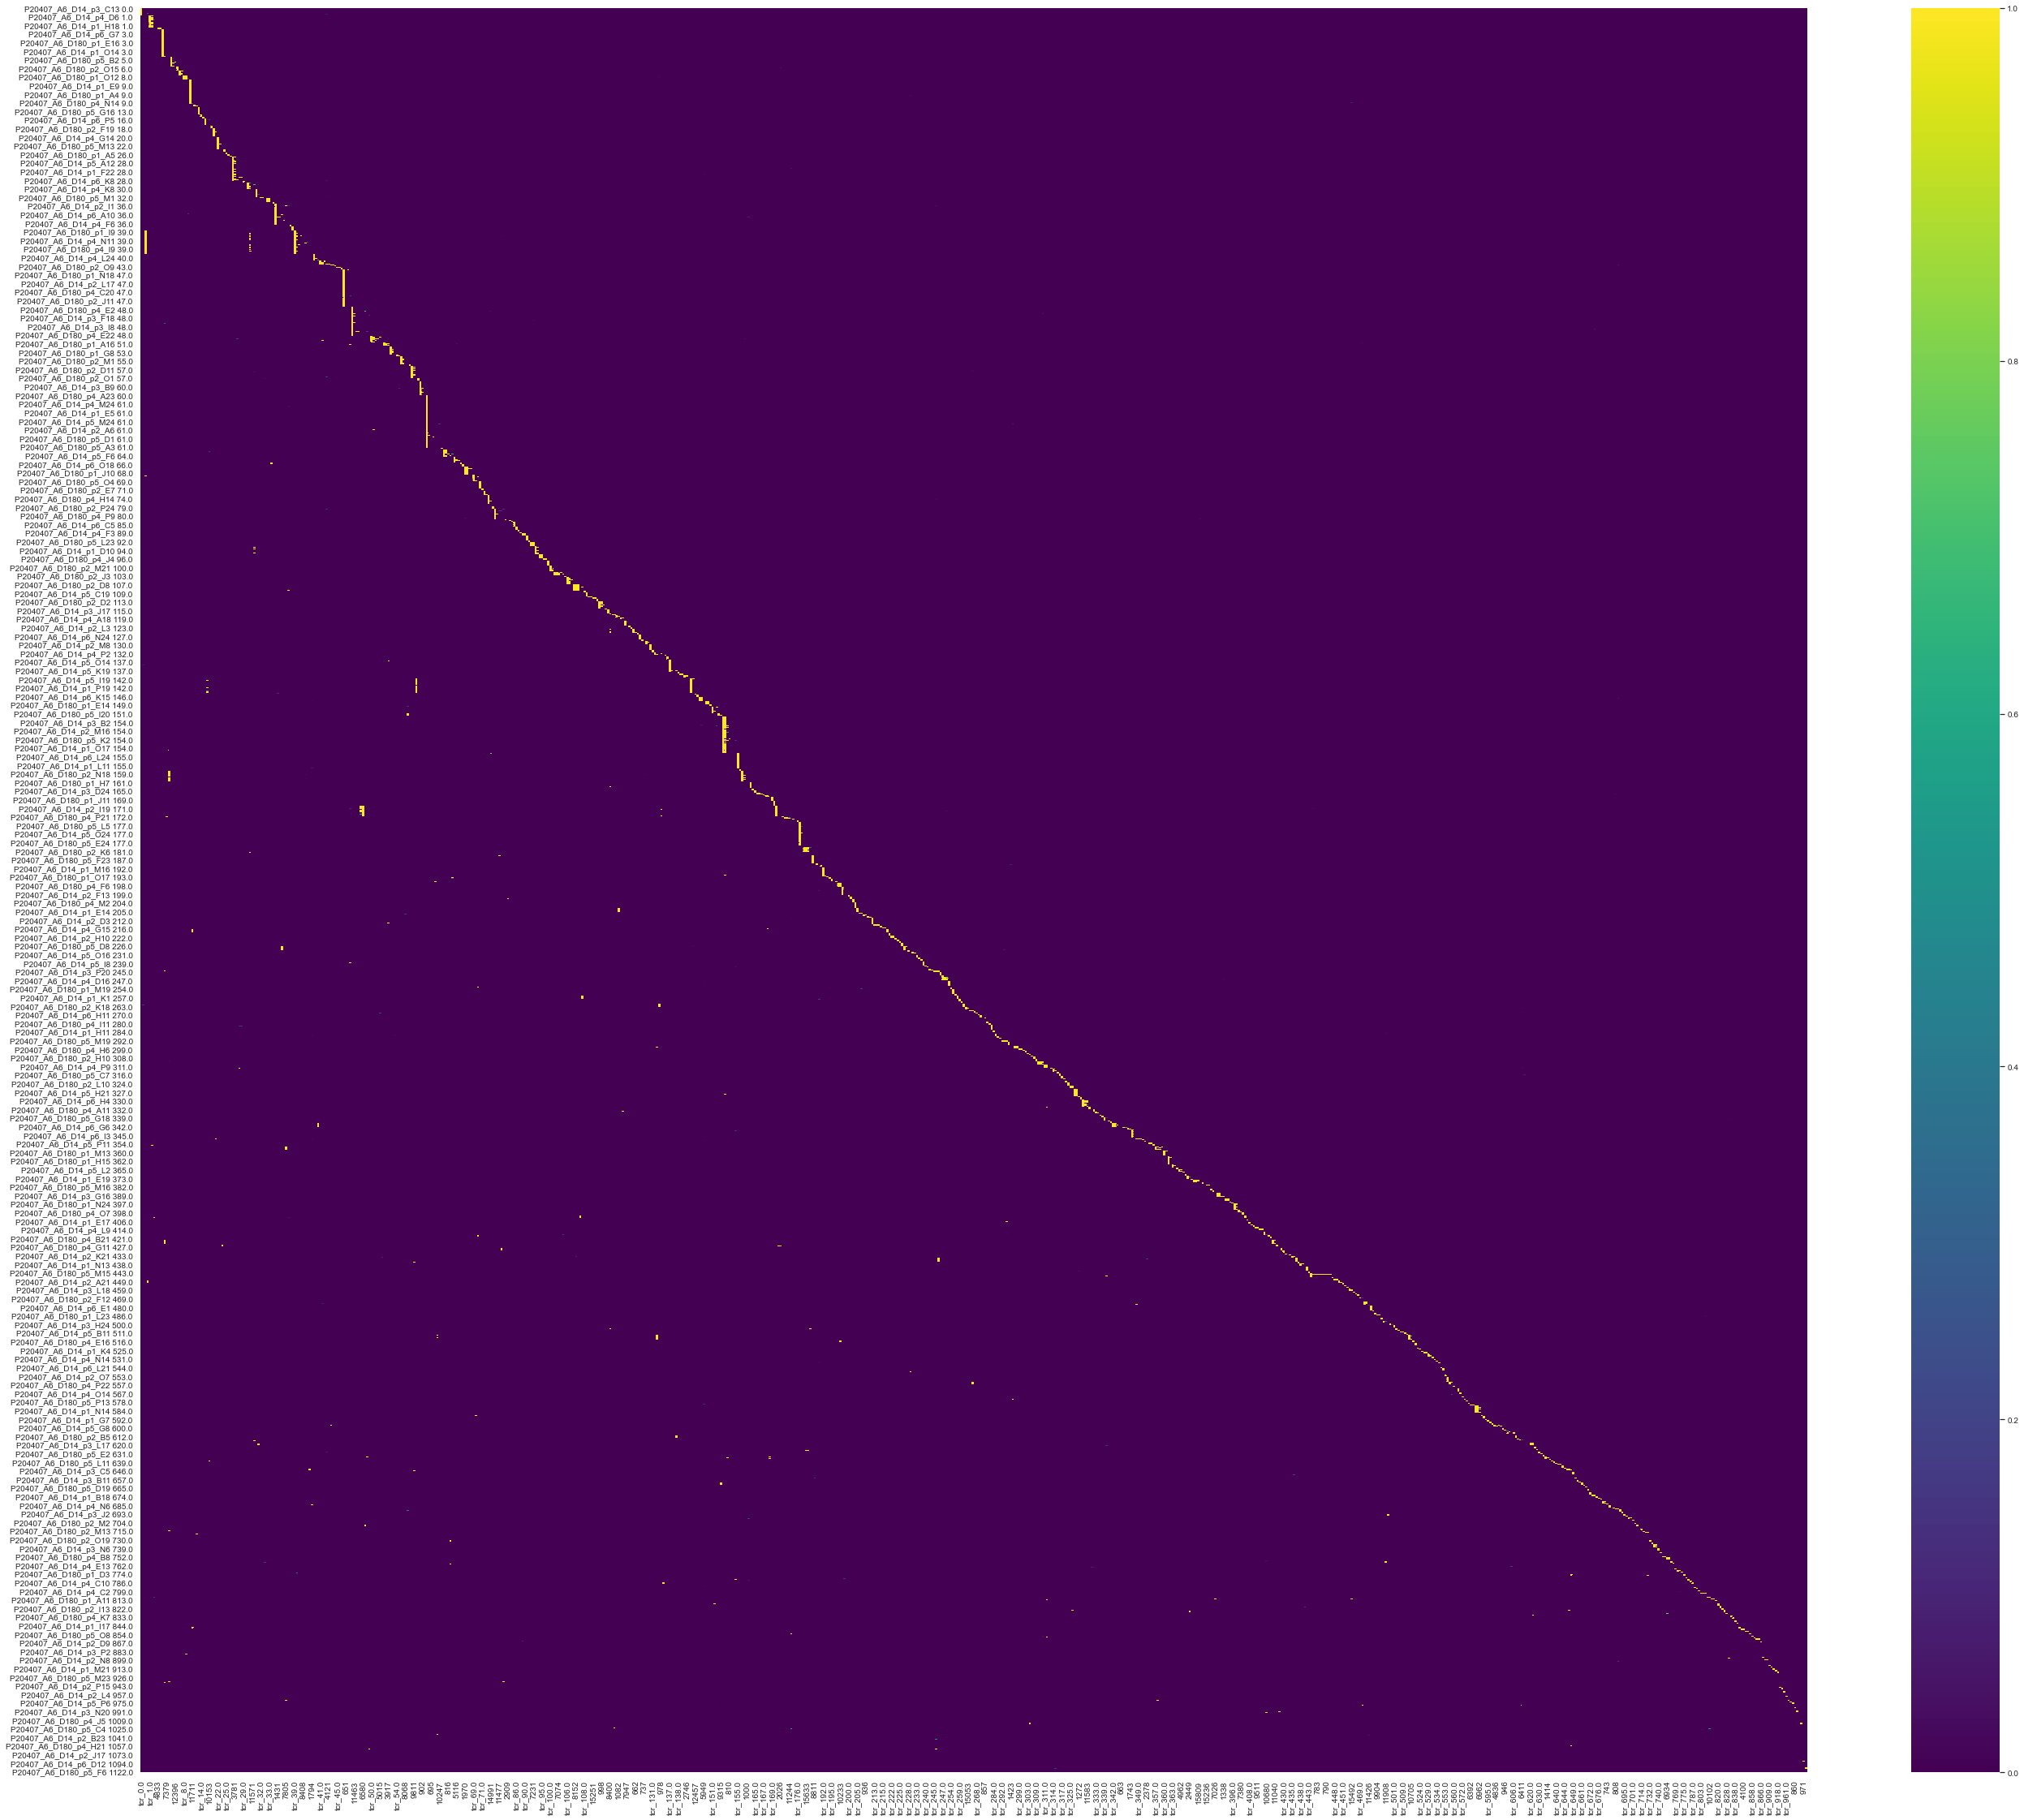

In [48]:
subindex = [idx for idx in plot_pmat.index if idx in pmat_at_least_2_cells.index]

with plot_style(figsize=(46, 40), ticklabelsize=10):
    sns.heatmap(plot_pmat.loc[subindex].T, cmap='viridis', linewidths=0.0)
    plt.xlabel('')
plt.savefig(f'pmat_{DATA_NAME}_{e_rate}_at_least_2_cells_v{version}.png')


In [64]:
mth = 0.2
n_mutations = (pmat > mth).sum(axis=0)
n_mutations.name = 'n_mutations'

In [65]:
n_mutations.head()

P20407_A6_D14_p3_C13     1
P20407_A6_D14_p4_P5      1
P20407_A6_D180_p4_D4     1
P20407_A6_D14_p3_F13     1
P20407_A6_D180_p4_L10    2
Name: n_mutations, dtype: int64

In [66]:
timepoints = clones_metadata.set_index('cell_id').reindex(clones_map_sorted.index)['day']
timepoints.name = 'timepoint'

In [67]:
timepoints_and_mutations = pd.concat((timepoints, n_mutations), axis=1)
timepoints_and_mutations.head()

timepoint  n_mutations
P20407_A6_D14_p3_C13          14            1
P20407_A6_D14_p4_P5           14            1
P20407_A6_D180_p4_D4         180            1
P20407_A6_D14_p3_F13          14            1
P20407_A6_D180_p4_L10        180            2

In [68]:
timepoints_and_mutations.timepoint.value_counts(dropna=False)

14     1970
180    1311
Name: timepoint, dtype: int64

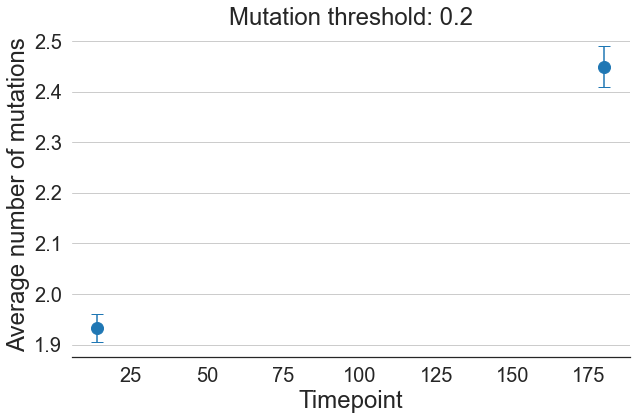

In [69]:
# !!! includes TCR
with plot_style(figsize=(10, 6), labelsize=24, ticklabelsize=20):
    mean = timepoints_and_mutations.groupby(['timepoint']).n_mutations.mean()
    sem = timepoints_and_mutations.groupby(['timepoint']).n_mutations.sem()
    mean.plot(ls='', marker='o', ms=12, yerr=sem, capsize=6)
    #plt.ylim(6, 10)
    plt.grid(axis='y')
    plt.ylabel('Average number of mutations')
    plt.xlabel('Timepoint')
    plt.title(f'Mutation threshold: {mth}')
    #plt.yticks(np.arange(2, 4.5, 0.5))
    #plt.ylim(0)

In [70]:
timepoints_and_mutations.groupby(['timepoint']).n_mutations.quantile([1-0.25, 0.25]).unstack(level=1)

0.75  0.25
timepoint            
14          2.0   1.0
180         3.0   1.0

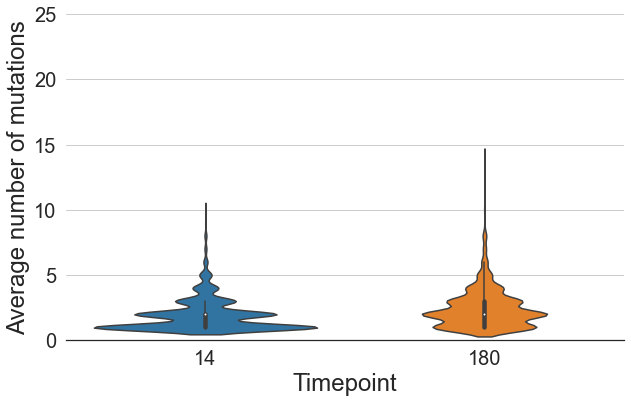

In [71]:
with plot_style(figsize=(10, 6), labelsize=24, ticklabelsize=20):
    sns.violinplot(data=timepoints_and_mutations, x='timepoint', y='n_mutations')
    plt.ylim(0, 25)
    plt.grid(axis='y')
    plt.ylabel('Average number of mutations')
    plt.xlabel('Timepoint')
